In [2]:
## Miscelaneous
import numpy as np
import os
import sys
import collections
import matplotlib.pyplot as plt
import loompy
from collections import Counter
from tqdm import tqdm
import pickle as pkl

import pandas as pd

import pybedtools
from pybedtools import BedTool

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import logging
logger = logging.getLogger()
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%H:%M:%S')

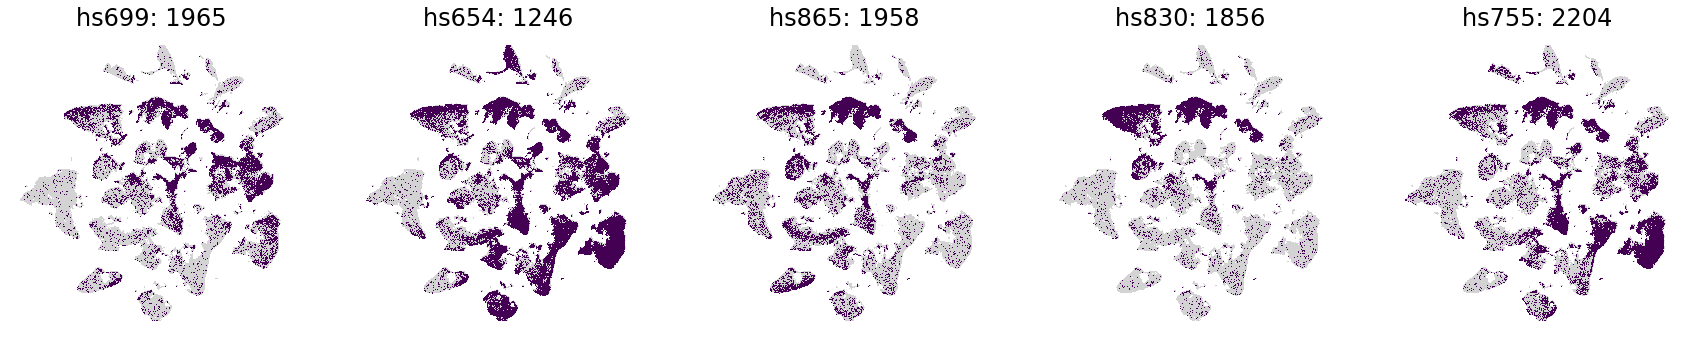

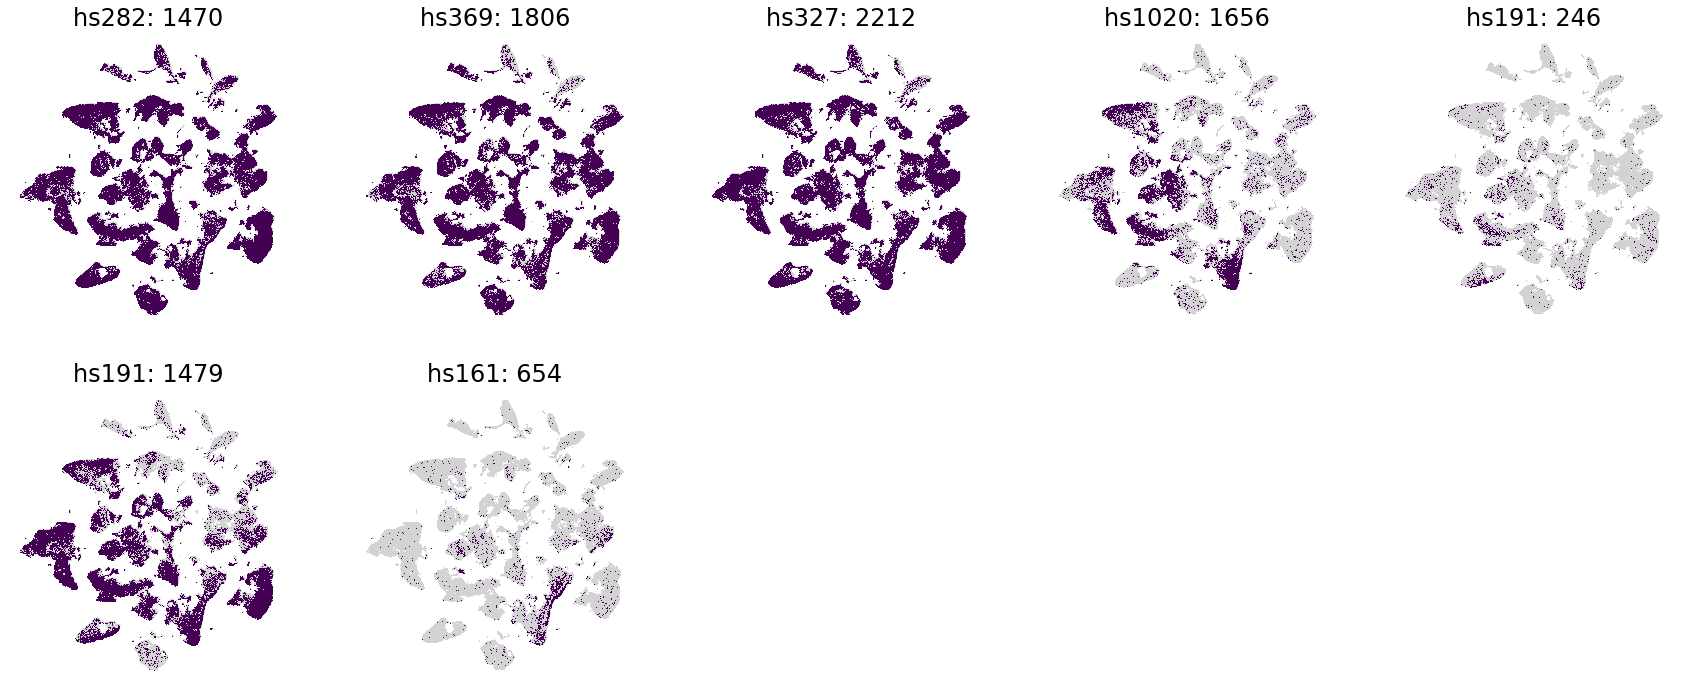

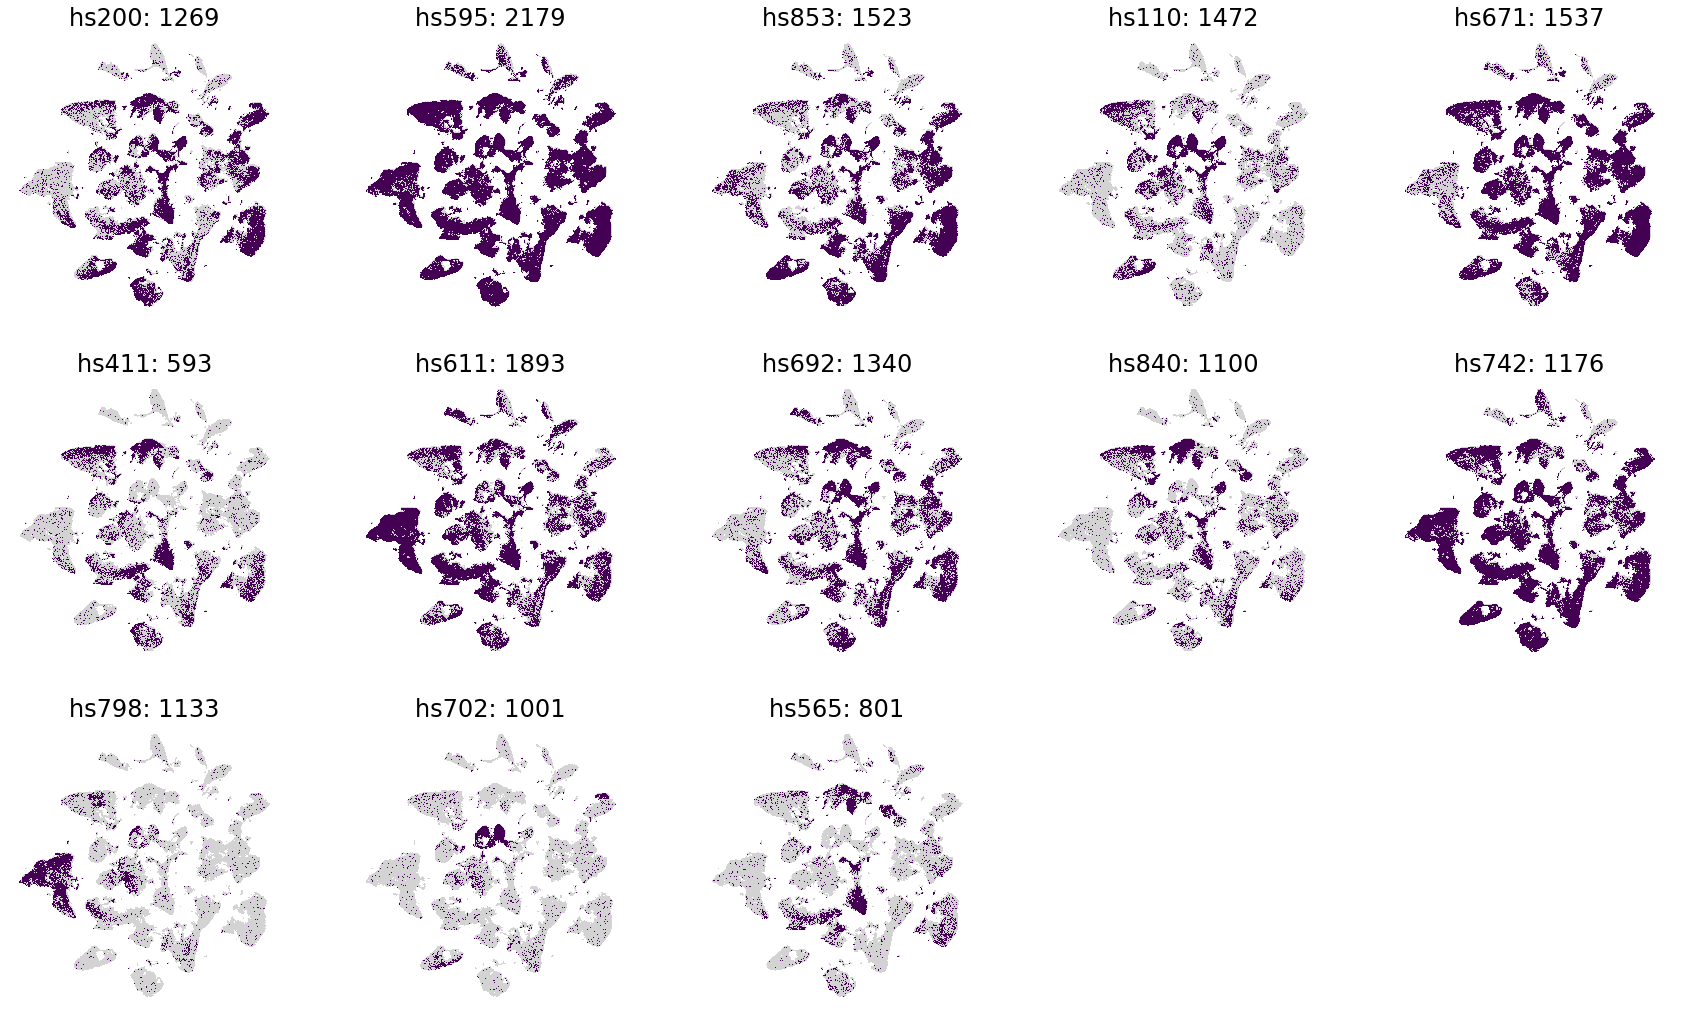

In [24]:
VISTA_dir = '/proj/DEV_ATAC/test/VISTA_enhancers/'
tissues = ['midbrain', 'hindbrain', 'forebrain']

for t in tissues:
    enh = BedTool(os.path.join(VISTA_dir, f'{t}_hg38.bed'))
    
    with loompy.connect('/proj/DEV_ATAC/Build_20211016/All/All_peaks.loom') as ds:
        peaks = BedTool([[c, s, e, ID] for c, s, e, ID in zip(ds.ra.Chr, ds.ra.Start, ds.ra.End, ds.ra.ID)])
        X = enh.intersect(peaks, wb=True, wa=True)    
        nrows = int(np.ceil(X.count()/5))
        fig, ax = plt.subplots(nrows, 5, figsize=(30, 6*nrows))
        ax = ax.flatten()

        for i, p in enumerate(X): 
            x = np.where(ds.ra.ID == p[7])[0]
            v = ds[x,:].flatten()
            ax[i].scatter(ds.ca.TSNE[:,0], ds.ca.TSNE[:,1], s=1, lw=0, marker=',', c='lightgrey')
            ax[i].scatter(ds.ca.TSNE[v>0,0], ds.ca.TSNE[v>0,1], s=1, lw=0, marker=',', c=v[v>0], cmap ='viridis')
            ax[i].axis('off')
            ax[i].set_aspect('equal')
#             ax[i].set_title(p[3], fontsize=24)
            ax[i].set_title(f'{p[3]}: {int(ds.ra.End[x])-int(ds.ra.Start[x])}', fontsize=24)

        if (i+1) < len(ax):
            for i in range(i,len(ax)):
                ax[i].axis('off')

(array([ 86888., 164823., 117562.,  62454.,  31733.,  16524.,   8555.,
          4555.,   2487.,   1245.]),
 array([   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100., 2400.,
        2700., 3000.]),
 <BarContainer object of 10 artists>)

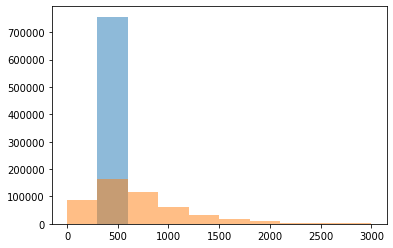

In [30]:
with loompy.connect('/datb/sl/camiel/tumor/Healthy_tissues_scATAC/Ren_peripherals/All/All_peaks.agg.loom') as ds:
    X = ds.ra.End.astype(int) - ds.ra.Start.astype(int)
with loompy.connect('/proj/DEV_ATAC/Build_20211016/All/All_peaks.loom') as ds:
    Y = ds.ra.End.astype(int) - ds.ra.Start.astype(int)
    
plt.hist(X, range=(0,3000), alpha=.5)
plt.hist(Y, range=(0,3000), alpha=.5)

In [11]:
with loompy.connect('/proj/DEV_ATAC/Build_20211016/All/All_peaks.agg.loom') as ds:
    print(ds.ra.keys())
    print(ds.ra.ID)

['Annotation', 'Chr', 'CpG%', 'Detailed Annotation', 'Distance to TSS', 'End', 'Entrez ID', 'Focus Ratio-Region Size', 'GC%', 'Gene Alias', 'Gene Description', 'Gene Name', 'Gene Type', 'ID', 'NCells', 'Nearest Ensembl', 'Nearest PromoterID', 'Nearest Refseq', 'Nearest Unigene', 'Peak Score', 'Start', 'Strand', 'Valid', 'markerPeaks', 'precluster_mu', 'precluster_sd', 'totals']
['chr10:100000291-100000580' 'chr10:100008915-100010719'
 'chr10:100016824-100017089' ... 'chrY:7837000-7837577'
 'chrY:7881875-7882408' 'chrY:8562577-8562780']


['Age', 'CPM_thres', 'Chemistry_multiome_atac', 'Chemistry_v1', 'Chemistry_v1_1', 'Clusters', 'Enriched_Motifs', 'NCells', 'NPeaks', 'Outliers', 'Sex_', 'TSNE', 'Tissue_Brain', 'Tissue_Cerebellum', 'Tissue_Cortex', 'Tissue_Diencephalon', 'Tissue_Hindbrain', 'Tissue_Medulla', 'Tissue_Midbrain', 'Tissue_Pons', 'Total', 'UMAP', 'totals']
['', 'CPM', 'binary', 'log2fc', 'marker_peaks', 'residuals']
['CRX OTX2 PITX3 PITX1 DPRX GSC' 'NFIB PITX1 OTX2 CRX NFIA PITX3'
 'NFIB OTX2 DPRX CRX GSC PITX1' 'SOX9 SOX10 SOX3 OTX2 PITX1 DPRX'
 'SOX9 SOX3 SOX10 CRX OTX2 SOX2' 'OTX2 GSC PITX1 SOX3 DPRX OTX1'
 'CRX OTX2 PITX1 GSC OTX1 DPRX']


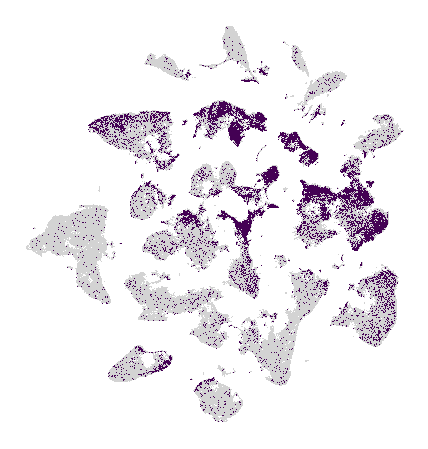

In [24]:
p = 'chr1:50568810-50570776'
with loompy.connect('/proj/DEV_ATAC/Build_20211016/All/All_peaks.agg.loom') as ds:
    print(ds.ca.keys())
    print(ds.layers.keys())

    x = np.where(ds.ra.ID == p)[0]
    mark = ds['marker_peaks'][x,:][0].astype(bool)
    print(ds.ca['Enriched_Motifs'][mark])
    cls = ds.ca.Clusters[mark]
    
with loompy.connect('/proj/DEV_ATAC/Build_20211016/All/All_peaks.loom') as ds:
    x = np.where(ds.ra.ID == p)[0]
    v = ds[x,:].flatten()
    plt.figure(figsize=(8,8))
    plt.scatter(ds.ca.TSNE[:,0], ds.ca.TSNE[:,1], s=1, lw=0, marker=',', c='lightgrey')
    plt.scatter(ds.ca.TSNE[v>0,0], ds.ca.TSNE[v>0,1], s=1, lw=0, marker=',', c=v[v>0], cmap ='viridis')
    plt.axis('off')
    plt.gca().set_aspect('equal')